[abp,ppg] , (-1, 2, 1250)

In [1]:
import h5py
import os
from mat73 import loadmat 
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#You need to install the package mat73 because PulseDB uses MAT file version 7.3 to store large volume data

def Build_Dataset(Path,FieldName='Subset'):
        Data=loadmat(Path)
        # Access 10-s segments of ECG, PPG and ABP signals
        Signals=Data[FieldName]['Subject']
        print(Signals.shape)
        # Access SBP labels of each 10-s segment
        # SBPLabels=Data[FieldName]['SBP']
        # # Access Age of the subject corresponding to each of the 10-s segment
        # Age=Data[FieldName]['Age']
        # # Access Gender of the subject corresponding to each of the 10-s segment
        # Gender=np.array(Data[FieldName]['Gender']).squeeze()
        # # Convert Gender to numerical 0-1 labels
        # Gender=(Gender=='M').astype(float)
        # # Access Height and Weight of the subject corresponding to each of the 10-s segment
        # # If the subject is from the MIMIC-III matched subset, height and weight will be NaN 
        # # since they were only recorded in VitalDB
        # Height=Data[FieldName]['Height']
        # Weight=Data[FieldName]['Weight']
        # # Concatenate the demographic information as one matrix
        # Demographics=np.stack((Age,Gender,Height,Weight),axis=1)
        return Signals #,SBPLabels,Demographics


In [ ]:
Build_Dataset('..\\data\\raw\\PulseDB\\Train_Subset.mat')

In [2]:
idx = [0,300000,600000,902160]

In [3]:

import h5py
import os
save_dir = r"../data/processed/BP_npy/PulseDB"
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    for i in range(2,3):
        data = f['Subset']["Signals"][:,:,idx[i]:idx[i+1]]
        data = np.array(data).transpose(2,1,0)[:,[2,1]] 
        np.save(os.path.join(save_dir,f"train_{i}.npy"),data)
# Signals = Build_Dataset('..\\data\\raw\\PulseDB\\Train_Subset.mat')[:,[2,1]]



In [ ]:
import os 
save_dir = r"../data/processed/BP_npy/PulseDB"
os.makedirs(save_dir,exist_ok=True)


In [ ]:
Signals = Build_Dataset('..\\data\\raw\\PulseDB\\CalFree_Test_Subset.mat')[:,[2,1]]
np.save(os.path.join(save_dir,"test.npy"),Signals)

# val split

## Subject  みる


In [25]:
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    # data = f['Subset']["Signals"][:,:,48868]
    print(f['Subset'].keys())
    sbp = np.array(f['Subset']["SBP"][0])
    dbp = np.array(f['Subset']["DBP"][0])
    subject = np.array(f["Subset"]["Subject"])
    print(sbp.shape,dbp.shape,subject.shape)
    print(type(f['Subset']))

<KeysViewHDF5 ['ABP', 'Age', 'BMI', 'DBP', 'ECG', 'Gender', 'Height', 'PPG', 'SBP', 'Signals', 'Subject', 'Weight']>
(902160,) (902160,) (1, 902160)
<class 'h5py._hl.group.Group'>


In [ ]:
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    f.visit(print_name)

In [9]:
fullnames = []
patient_ids = []
entry_index = []
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    def print_name(name):
        print(name)
    f2  = np.array(f['Subset/Subject'][:]) 
    a = f[f2[0][0]]
    print(a[:])
    result = ''.join(chr(i[0]) for i in a[:])
    print(result)
    # print(str1)
    # print(f2.shape)

[[112]
 [ 48]
 [ 48]
 [ 48]
 [ 48]
 [ 48]
 [ 49]
 [ 95]
 [ 49]]
p000001_1


In [15]:
import h5py
import numpy as np
from tqdm import tqdm
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    # Object reference を含むデータを取得
    object_refs = np.array(f['Subset/Subject'][:])  # (1, 900000) のような shape を持つ

    patient_data = []  # patient_id, record_number を格納するリスト

    # すべてのオブジェクト参照を処理
    for ref in tqdm(object_refs.flatten()):  # 1次元にする
        # if ref in f:  # 参照が有効か確認
        obj = f[ref]  # HDF5 データセットを取得
        ascii_array = obj[:]  # 全データを取得（例: [[112], [48], [48], ...]）

        # ASCII コードを文字列に変換
        string_value = ''.join(map(chr, ascii_array.flatten()))

        # アンダースコアで分割し、整数に変換
        patient_id_str, record_number_str = string_value.split('_')
        patient_id = int(patient_id_str[1:])  # 'p000001' → 1 に変換
        record_number = int(record_number_str)  # '1' → 1 に変換

        # 結果をリストに追加
        patient_data.append((patient_id, record_number))

# 結果を NumPy 配列に変換
patient_data_array = np.array(patient_data)

# 確認のため最初の数個を表示
print(patient_data_array[:10])  # [(1, 1), (2, 1), ...]


100%|██████████| 902160/902160 [00:56<00:00, 15981.25it/s]


[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [41]:
patient_data_array[::100][-1]

array([99982,     0])

In [15]:
patient_data_array[::100][:20]

array([[ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 3,  1],
       [ 3,  1],
       [ 3,  1],
       [ 3,  1],
       [ 5,  1],
       [ 5,  1],
       [ 5,  1],
       [12,  1],
       [12,  1],
       [12,  1],
       [12,  1],
       [13,  1],
       [13,  1],
       [13,  1],
       [16,  1],
       [16,  1]])

In [18]:
len(np.where(patient_data_array[:,1]==0)[0])


436680

In [26]:
# num of patients (on paper:2506)
len(np.unique(patient_data_array[:,0]))


2494

In [23]:
patient_data_array[np.where(patient_data_array[:,1]==0)][::100][:20]

array([[188,   0],
       [188,   0],
       [188,   0],
       [188,   0],
       [543,   0],
       [543,   0],
       [543,   0],
       [543,   0],
       [618,   0],
       [618,   0],
       [618,   0],
       [652,   0],
       [652,   0],
       [652,   0],
       [652,   0],
       [735,   0],
       [735,   0],
       [735,   0],
       [773,   0],
       [773,   0]])

In [16]:

unique_n, indices = np.unique(patient_data_array[:, 0], return_inverse=True)
flags = np.zeros(len(unique_n), dtype=int)

# 0 or 1 をフラグ化
flags[indices] |= 1 << patient_data_array[:, 1]

# [n,0] と [n,1] の両方がある n を取得
both_exist_n = unique_n[flags == 3]  # 3 (0b11) なら両方存在

print("両方存在する n:", both_exist_n)


両方存在する n: []


In [28]:
patient_data_array[:,0].shape


(902160,)

In [35]:
from sklearn.model_selection import GroupKFold
indices = patient_data_array[:, 0].astype(int)  # index部分を取得

# 1. index単位でfoldを分けるため、ユニークなindexを取得
unique_indices = np.unique(indices)
skf = GroupKFold(n_splits=5)

# index ごとのデータ数を考慮して分割
train_indexes = []
val_indexes = []
for fold, (train_index, val_idx) in enumerate(skf.split(indices, groups=indices)):
    train_indexes.append(train_index)
    val_indexes.append(val_idx)


In [36]:
for i in range(5):
    print(train_indexes[i].shape)
    print(val_indexes[i].shape)


(721440,)
(180720,)
(721800,)
(180360,)
(721800,)
(180360,)
(721800,)
(180360,)
(721800,)
(180360,)


In [38]:
indexes = [train_indexes,val_indexes]


In [40]:
import pickle

save_path = r"../data/processed/BP_npy/PulseDB/cv_5fold.pkl"
with open(save_path, "wb") as f:
    pickle.dump(indexes, f)

In [17]:
Signals.shape

NameError: name 'Signals' is not defined

## 2labels

In [18]:
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    # data = f['Subset']["Signals"][:,:,48868]
    print(f['Subset'].keys())
    sbp = np.array(f['Subset']["SBP"][0])
    dbp = np.array(f['Subset']["DBP"][0])
    subject = np.array(f["Subset"]["Subject"])
    print(sbp.shape,dbp.shape,subject.shape)
    print(type(f['Subset']))

<KeysViewHDF5 ['ABP', 'Age', 'BMI', 'DBP', 'ECG', 'Gender', 'Height', 'PPG', 'SBP', 'Signals', 'Subject', 'Weight']>
(902160,) (902160,) (1, 902160)
<class 'h5py._hl.group.Group'>


In [17]:
mask = np.where((sbp>140) | (sbp < 100))[0]
len(mask)


312440

In [19]:
import h5py
import numpy as np
from tqdm import tqdm
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    # Object reference を含むデータを取得
    object_refs = np.array(f['Subset/Subject'][:])  # (1, 900000) のような shape を持つ
    object_refs = object_refs[0][mask]
    patient_data = []  # patient_id, record_number を格納するリスト

    # すべてのオブジェクト参照を処理
    for ref in tqdm(object_refs):  # 1次元にする
        # if ref in f:  # 参照が有効か確認
        obj = f[ref]  # HDF5 データセットを取得
        ascii_array = obj[:]  # 全データを取得（例: [[112], [48], [48], ...]）

        # ASCII コードを文字列に変換
        string_value = ''.join(map(chr, ascii_array.flatten()))

        # アンダースコアで分割し、整数に変換
        patient_id_str, record_number_str = string_value.split('_')
        patient_id = int(patient_id_str[1:])  # 'p000001' → 1 に変換
        record_number = int(record_number_str)  # '1' → 1 に変換

        # 結果をリストに追加
        patient_data.append((patient_id, record_number))

# 結果を NumPy 配列に変換
patient_data_array = np.array(patient_data)

# 確認のため最初の数個を表示
print(patient_data_array[:10])  # [(1, 1), (2, 1), ...]

100%|██████████| 312440/312440 [00:16<00:00, 19163.08it/s]


[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [20]:

unique_n, indices = np.unique(patient_data_array[:, 0], return_inverse=True)
flags = np.zeros(len(unique_n), dtype=int)

# 0 or 1 をフラグ化
flags[indices] |= 1 << patient_data_array[:, 1]

# [n,0] と [n,1] の両方がある n を取得
both_exist_n = unique_n[flags == 3]  # 3 (0b11) なら両方存在

print("両方存在する n:", both_exist_n)

両方存在する n: []


In [21]:
from sklearn.model_selection import GroupKFold
indices = patient_data_array[:, 0].astype(int)  # index部分を取得

# 1. index単位でfoldを分けるため、ユニークなindexを取得
unique_indices = np.unique(indices)
skf = GroupKFold(n_splits=5)

# index ごとのデータ数を考慮して分割
train_indexes = []
val_indexes = []
for fold, (train_index, val_idx) in enumerate(skf.split(indices, groups=indices)):
    train_indexes.append(train_index)
    val_indexes.append(val_idx)

In [22]:
for i in range(5):
    print(train_indexes[i].shape)
    print(val_indexes[i].shape)

(249952,)
(62488,)
(249952,)
(62488,)
(249952,)
(62488,)
(249952,)
(62488,)
(249952,)
(62488,)


In [29]:
train_indexes[0][:-10],val_indexes[0][:10],train_indexes[1][:-10],val_indexes[1][:10]

(array([     0,      1,      2, ..., 312240, 312241, 312242]),
 array([44, 45, 46, 47, 48, 49, 50, 51, 52, 53]),
 array([     0,      1,      2, ..., 312427, 312428, 312429]),
 array([983, 984, 985, 986, 987, 988, 989, 990, 991, 992]))

In [23]:
indexes = [train_indexes,val_indexes]


In [24]:
import pickle

save_path = r"../data/processed/BP_npy/PulseDB/cv_5fold_2labels.pkl"
with open(save_path, "wb") as f:
    pickle.dump(indexes, f)

## 4class

In [21]:
import h5py
import numpy as np
from tqdm import tqdm
with h5py.File('..\\data\\raw\\PulseDB\\Train_Subset.mat', 'r') as f:
    # Object reference を含むデータを取得
    object_refs = np.array(f['Subset/Subject'][:])[0]  # (1, 900000) のような shape を持つ
    # object_refs = object_refs[0][mask]
    patient_data = []  # patient_id, record_number を格納するリスト

    # すべてのオブジェクト参照を処理
    for ref in tqdm(object_refs):  # 1次元にする
        # if ref in f:  # 参照が有効か確認
        obj = f[ref]  # HDF5 データセットを取得
        ascii_array = obj[:]  # 全データを取得（例: [[112], [48], [48], ...]）

        # ASCII コードを文字列に変換
        string_value = ''.join(map(chr, ascii_array.flatten()))

        # アンダースコアで分割し、整数に変換
        patient_id_str, record_number_str = string_value.split('_')
        patient_id = int(patient_id_str[1:])  # 'p000001' → 1 に変換
        record_number = int(record_number_str)  # '1' → 1 に変換

        # 結果をリストに追加
        patient_data.append((patient_id, record_number))

# 結果を NumPy 配列に変換
patient_data_array = np.array(patient_data)

# 確認のため最初の数個を表示
print(patient_data_array[:10])  # [(1, 1), (2, 1), ...]

100%|██████████| 902160/902160 [00:45<00:00, 19953.82it/s]


[[1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]]


In [23]:
from sklearn.model_selection import StratifiedGroupKFold
indices = patient_data_array[:, 0].astype(int)  # index部分を取得

# 1. index単位でfoldを分けるため、ユニークなindexを取得
unique_indices = np.unique(indices)
skf = StratifiedGroupKFold(n_splits=5,shuffle=False)
labels = np.load(r"../data/processed/BP_npy/PulseDB/train_sbp_4labels.npy")  # ここでラベルを読み込む
# index ごとのデータ数を考慮して分割
train_indexes = []
val_indexes = []
for fold, (train_index, val_idx) in enumerate(skf.split(indices,labels, groups=indices)):
    train_indexes.append(train_index)
    val_indexes.append(val_idx)

In [24]:
for i in range(5):
    print(train_indexes[i].shape)
    print(val_indexes[i].shape)
    labels_train = labels[train_indexes[i]]
    labels_val = labels[val_indexes[i]]
    print(np.unique(labels_train, return_counts=True))
    print(np.unique(labels_val, return_counts=True))    

(721440,)
(180720,)
(array([0, 1, 2, 3]), array([137448, 268709, 202811, 112472], dtype=int64))
(array([0, 1, 2, 3]), array([34334, 67441, 50757, 28188], dtype=int64))
(721800,)
(180360,)
(array([0, 1, 2, 3]), array([137346, 269069, 202888, 112497], dtype=int64))
(array([0, 1, 2, 3]), array([34436, 67081, 50680, 28163], dtype=int64))
(721800,)
(180360,)
(array([0, 1, 2, 3]), array([137438, 268960, 202854, 112548], dtype=int64))
(array([0, 1, 2, 3]), array([34344, 67190, 50714, 28112], dtype=int64))
(721800,)
(180360,)
(array([0, 1, 2, 3]), array([137461, 268906, 202822, 112611], dtype=int64))
(array([0, 1, 2, 3]), array([34321, 67244, 50746, 28049], dtype=int64))
(721800,)
(180360,)
(array([0, 1, 2, 3]), array([137435, 268956, 202897, 112512], dtype=int64))
(array([0, 1, 2, 3]), array([34347, 67194, 50671, 28148], dtype=int64))


In [25]:
import pickle
indexes = [train_indexes,val_indexes]
save_path = r"../data/processed/BP_npy/PulseDB/cv_5fold_4labels.pkl"
with open(save_path, "wb") as f:
    pickle.dump(indexes, f)

# 血圧正規化


In [4]:
t0 = np.load(save_dir+"\\train_0.npy")
t1 = np.load(save_dir+"\\train_1.npy")
t2 = np.load(save_dir+"\\train_2.npy")
t = np.concatenate([t0,t1,t2])
t.shape

(902160, 2, 1250)

In [14]:
t.max(axis=2).argmax(axis=0),t.min(axis=2).argmin(axis=0)

(array([48868,     0], dtype=int64), array([303919,      0], dtype=int64))

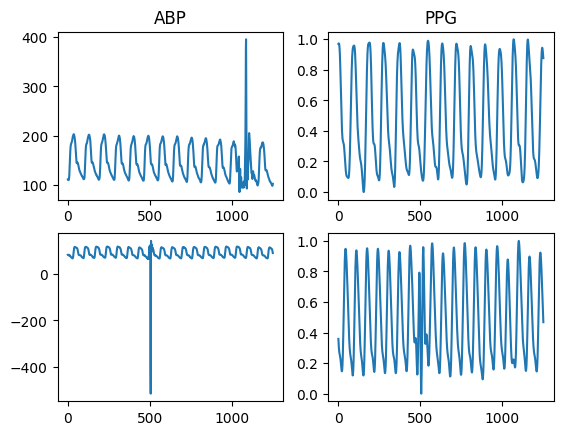

In [36]:
plt.subplot(221)
plt.title("ABP")
plt.plot(t[48868,0])
plt.subplot(222)
plt.title("PPG")
plt.plot(t[48868,1])
plt.subplot(223)
plt.plot(t[303919,0])
plt.subplot(224)
plt.plot(t[303919,1])

In [31]:
from scipy.stats import pearsonr

In [32]:
pearsonr(t[48868,0], t[48868,1])

PearsonRResult(statistic=-0.3734432061240773, pvalue=1.192889049258426e-42)

In [33]:
pearsonr(t[303919,0], t[303919,1])

PearsonRResult(statistic=0.6035208932246228, pvalue=6.737285984559877e-125)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler_ppg = MinMaxScaler()
scaler_abp = MinMaxScaler()
params = np.zeros((2,2))
params[0,0] = scaler_abp.min_[0]
params[0,1] = scaler_abp.scale_[0]
params[1,0] = scaler_ppg.min_[0]
params[1,1] = scaler_ppg.scale_[0]

AttributeError: 'MinMaxScaler' object has no attribute 'min_'

# 4 class

In [9]:
a = np.load(r"../data/processed/BP_npy/PulseDB/test_2.npy")
a.shape,a.max(axis=2).max(axis=0)

((38110, 2, 1250), array([315.77010745,   1.        ]))

In [ ]:
a = np.load(r"../data/processed/BP_npy/PulseDB/test.npy")
a.shape
a.max(axis=2).max(axis=0), a.min(axis=2).min(axis=0)


array([374.40332499,   1.        ])

In [26]:
a = np.load(r"../data/processed/BP_npy/PulseDB/test_raw.npy")
np.save(r"../data/processed/BP_npy/PulseDB/test_4.npy",a[:,1].reshape(-1,1,1250))


In [27]:
a = np.load(r"../data/processed/BP_npy/PulseDB/train_raw.npy")
np.save(r"../data/processed/BP_npy/PulseDB/train_4.npy",a[:,1].reshape(-1,1,1250))

In [ ]:

# ラベリング関数の定義
def label_blood_pressure(bp):
    if bp < 100:
        return 0    # 正常血圧
    elif 100 <= bp < 120:
        return 1    # 正常血圧
    elif 120 <= bp < 140:
        return 2    # 正常高値血圧
    else:
        return 3    # 高血圧

# ベクトル化した関数を作成
vectorized_label = np.vectorize(label_blood_pressure)

# データ全体にラベリングを適用
bp_data = np.load('../data/processed/BP_npy/PulseDB/train_sbp.npy')
print(bp_data.shape)
bp_labels = vectorized_label(bp_data)
np.save('../data/processed/BP_npy/PulseDB/train_sbp_4labels.npy', bp_labels)
bp_data = np.load('../data/processed/BP_npy/PulseDB/test_sbp.npy')
print(bp_data.shape)
bp_labels = vectorized_label(bp_data)
np.save('../data/processed/BP_npy/PulseDB/test_sbp_4labels.npy', bp_labels)

(902160,)
(111600,)


In [2]:
import numpy as np
from sklearn.model_selection import StratifiedGroupKFold
StratifiedGroupKFold

sklearn.model_selection._split.StratifiedGroupKFold

# to csv


In [2]:
import numpy as np

In [4]:
a = np.load(r"../data/processed/BP_npy/PulseDB/test.npy")
ext = a[:1000,1].reshape(1000,1250)
np.savetxt(r"../data/processed/csv/PulseDB/output.csv", ext, delimiter=",", fmt="%f")

resample to 1000Hz

In [3]:
a = np.load(r"../data/processed/BP_npy/PulseDB/test.npy")
ext = a[:1000,1].reshape(1000,1250)
np.savetxt(r"../data/processed/csv/PulseDB/output.csv", ext, delimiter=",", fmt="%f")

In [4]:
from scipy.signal import resample
fs_in = 125         # 元のサンプリングレート
fs_out = 1000       # 新しいサンプリングレート
duration = 1000 / fs_in  # 秒数（8秒）
n_out = int(duration * fs_out)  # アップサンプリング後の点数 = 8000
signal_1000hz = resample(ext, n_out)

In [5]:
np.savetxt(r"../data/processed/csv/PulseDB/output_1000Hz.csv", ext, delimiter=",", fmt="%f")

In [8]:
import os
import numpy as np
a = np.load(r"../data/processed/BP_npy/PulseDB/test_raw.npy")
a.shape

(111600, 2, 1250)

In [9]:
a[0,:,0]

array([68.23103804,  0.29327659])

# extract subject number

In [3]:
from tqdm import tqdm
with h5py.File('..\\data\\raw\\PulseDB\\CalFree_Test_Subset.mat', 'r') as f:
    # Object reference を含むデータを取得
    object_refs = np.array(f['Subset/Subject'][:])  # (1, 900000) のような shape を持つ

    patient_data = []  # patient_id, record_number を格納するリスト

    # すべてのオブジェクト参照を処理
    for ref in tqdm(object_refs.flatten()):  # 1次元にする
        # if ref in f:  # 参照が有効か確認
        obj = f[ref]  # HDF5 データセットを取得
        ascii_array = obj[:]  # 全データを取得（例: [[112], [48], [48], ...]）

        # ASCII コードを文字列に変換
        string_value = ''.join(map(chr, ascii_array.flatten()))

        # アンダースコアで分割し、整数に変換
        patient_id_str, record_number_str = string_value.split('_')
        patient_id = int(patient_id_str[1:])  # 'p000001' → 1 に変換
        record_number = int(record_number_str)  # '1' → 1 に変換

        # 結果をリストに追加
        patient_data.append((patient_id, record_number))

# 結果を NumPy 配列に変換
patient_data_array = np.array(patient_data)


100%|██████████| 111600/111600 [00:05<00:00, 19762.92it/s]


In [4]:
patient_data_array.shape

(111600, 2)

In [6]:
patient_data_array = patient_data_array[:,0]

In [7]:
np.save(r"../data/processed/BP_npy/PulseDB/test_subjects.npy", patient_data_array)

In [8]:
sbp = np.load(r"../data/processed/BP_npy/PulseDB/test_sbp.npy")
sbp.shape

(111600,)

In [14]:
mask = np.where((sbp>140) | (sbp < 100)| (sbp ==120))[0]
print(mask)
patients_masked = patient_data_array[mask]
print(patients_masked.shape)
np.save(r"../data/processed/BP_npy/PulseDB/test_subjects_2.npy", patients_masked)

[     1      5      6 ... 111596 111597 111599]
(38110,)
